In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../System Manager/Python/credit_card_customer_data.csv')

In [3]:
df.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Data Cleaning

In [6]:
# Drop unwanted column

df.drop('Sl_No',axis=1,inplace=True)

In [7]:
# Check if there's null values

df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
# Handling outliers

def handle_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    
    print('Quartile 1 is',Q1)
    print('Quartile 3 is',Q3)
    print('IQR is', IQR)
    print('Lower limit is',lower_limit)
    print('Upper limit is',upper_limit)


In [9]:
handle_outliers(df['Avg_Credit_Limit'])

Quartile 1 is 10000.0
Quartile 3 is 48000.0
IQR is 38000.0
Lower limit is -47000.0
Upper limit is 105000.0


In [10]:
handle_outliers(df['Total_Credit_Cards'])

Quartile 1 is 3.0
Quartile 3 is 6.0
IQR is 3.0
Lower limit is -1.5
Upper limit is 10.5


In [11]:
handle_outliers(df['Total_visits_bank'])

Quartile 1 is 1.0
Quartile 3 is 4.0
IQR is 3.0
Lower limit is -3.5
Upper limit is 8.5


In [12]:
handle_outliers(df['Total_visits_online'])

Quartile 1 is 1.0
Quartile 3 is 4.0
IQR is 3.0
Lower limit is -3.5
Upper limit is 8.5


In [13]:
handle_outliers(df['Total_calls_made'])

Quartile 1 is 1.0
Quartile 3 is 5.0
IQR is 4.0
Lower limit is -5.0
Upper limit is 11.0


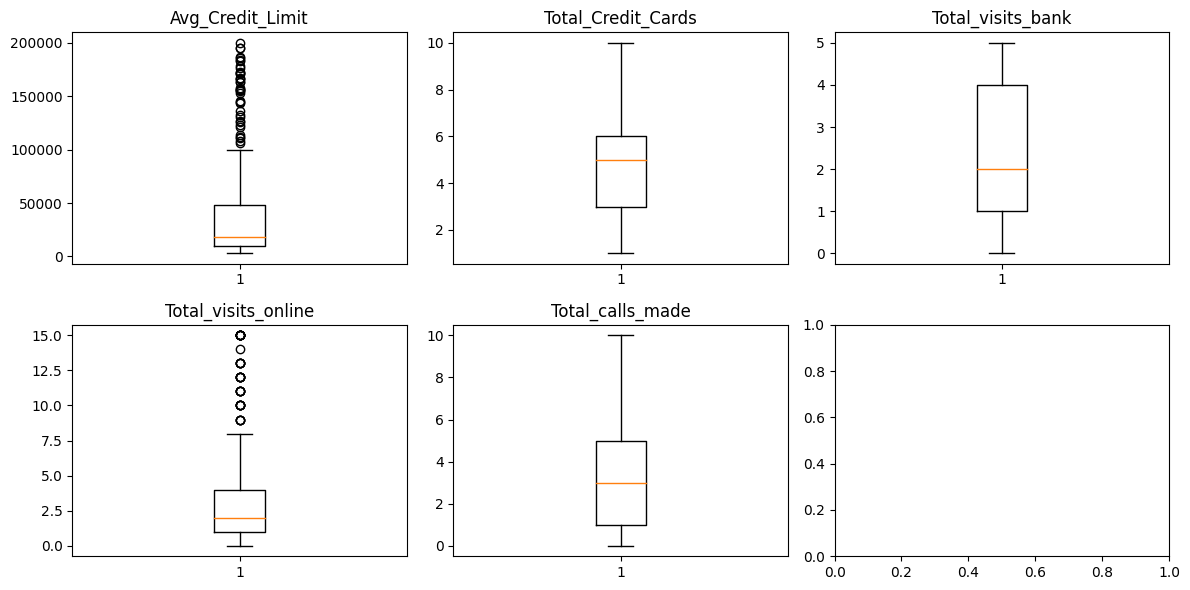

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

columns = df[['Avg_Credit_Limit',
             'Total_Credit_Cards',     
             'Total_visits_bank',      
             'Total_visits_online',    
             'Total_calls_made']]

for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    axes[row, col].boxplot(df[column])
    axes[row, col].set_title(column)
    
plt.tight_layout()

In [15]:
outlier = df[df['Avg_Credit_Limit'] > 105000]
outlier['Avg_Credit_Limit'].count()

39

### Explanatory Data Analysis

<Axes: >

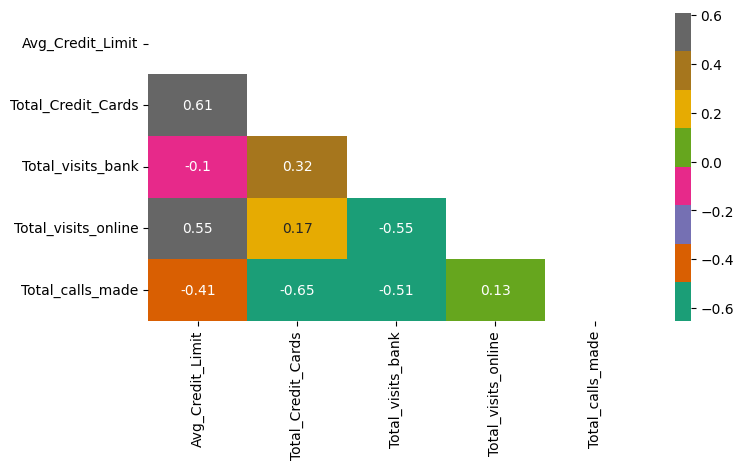

In [16]:
# Check the correlation of each feature AND visualize the feature

df_filtered = df.drop('Customer Key',axis=1)

plt.figure(figsize=(8,4))
corr = df_filtered.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='Dark2')

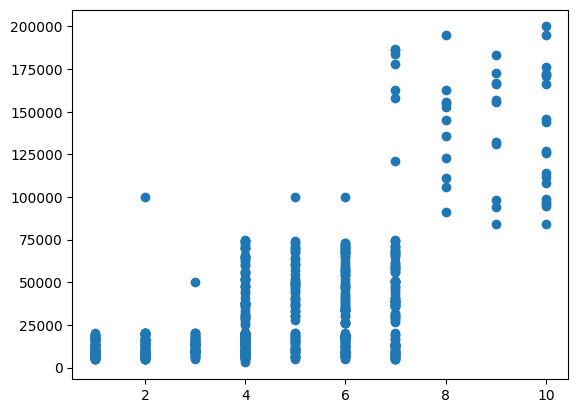

In [17]:
plt.scatter(df['Total_Credit_Cards'],df['Avg_Credit_Limit'])

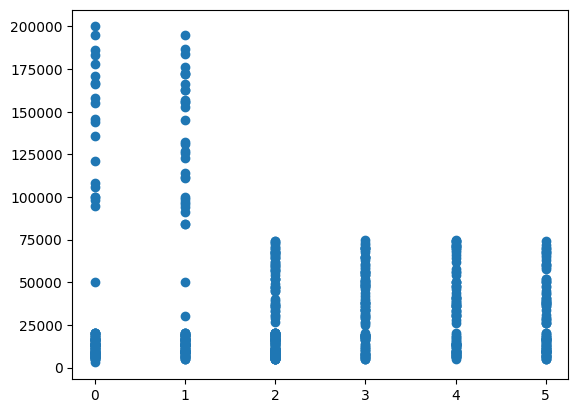

In [18]:
plt.scatter(df['Total_visits_bank'],df['Avg_Credit_Limit'])

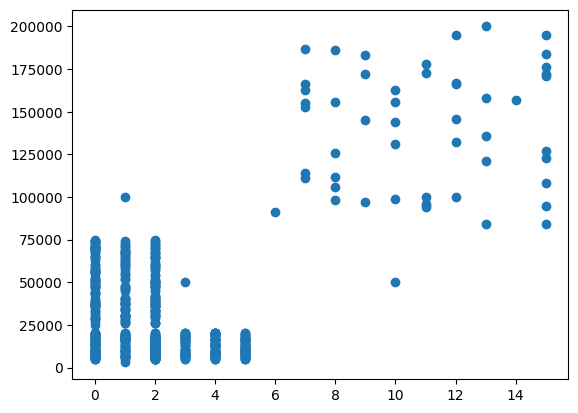

In [19]:
plt.scatter(df['Total_visits_online'],df['Avg_Credit_Limit'])

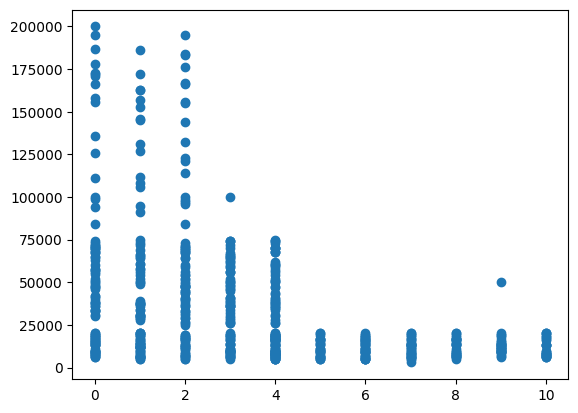

In [20]:
plt.scatter(df['Total_calls_made'],df['Avg_Credit_Limit'])

In [21]:
scaler = MinMaxScaler()
scaler.fit(df['Avg_Credit_Limit'].values.reshape(-1, 1))
df['Avg_Credit_Limit'] = scaler.transform(df['Avg_Credit_Limit'].values.reshape(-1, 1))

scaler.fit(df['Total_Credit_Cards'].values.reshape(-1, 1))
df['Total_Credit_Cards'] = scaler.transform(df['Total_Credit_Cards'].values.reshape(-1, 1))


In [22]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Total_Credit_Cards','Avg_Credit_Limit']])
y_predicted

C:\Users\System Manager\anaconda3\envs\JupyterNotebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2,

In [23]:
df['clusters'] = y_predicted
df

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,clusters
0,87073,0.492386,0.111111,1,1,0,0
1,38414,0.238579,0.222222,0,10,9,0
2,17341,0.238579,0.666667,1,3,4,2
3,40496,0.137056,0.444444,1,1,4,2
4,47437,0.492386,0.555556,0,12,3,2
...,...,...,...,...,...,...,...
655,51108,0.487310,1.000000,1,10,0,1
656,60732,0.411168,1.000000,1,13,2,1
657,53834,0.720812,0.777778,1,9,1,1
658,80655,0.857868,1.000000,1,15,0,1


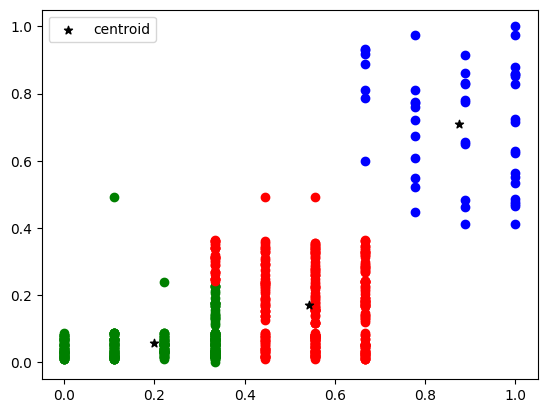

In [24]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

plt.scatter(df1['Total_Credit_Cards'],df1['Avg_Credit_Limit'],color='green')
plt.scatter(df2['Total_Credit_Cards'],df2['Avg_Credit_Limit'],color='blue')
plt.scatter(df3['Total_Credit_Cards'],df3['Avg_Credit_Limit'],color='red')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='black',marker='*', label='centroid')
plt.legend()

In [25]:
k_rng = range(1,15)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Total_Credit_Cards','Avg_Credit_Limit']])
    sse.append(km.inertia_)
               

C:\Users\System Manager\anaconda3\envs\JupyterNotebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\System Manager\anaconda3\envs\JupyterNotebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\System Manager\anaconda3\envs\JupyterNotebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\System Manager\anaconda3\envs\JupyterNotebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [26]:
sse

[62.273315279603196,
 31.651174652210603,
 15.679466636551023,
 10.530747170314775,
 7.667217072403497,
 5.878901983878554,
 4.756086344204632,
 4.004351803637247,
 3.6110559065606997,
 3.205135797265645,
 2.8512512348967864,
 2.481618502356719,
 2.195569564712682,
 1.9076597304995677]

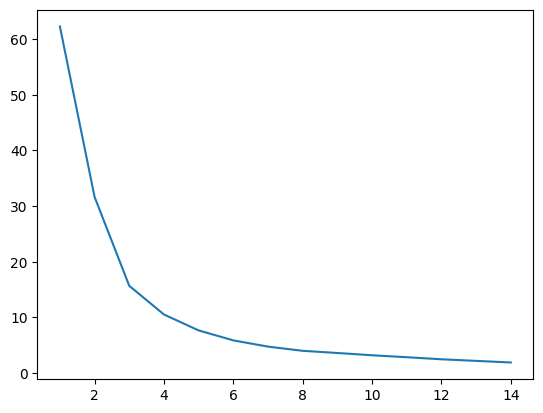

In [27]:
plt.plot(k_rng,sse)